<a href="https://colab.research.google.com/github/KiarashVaziri/Introduction-to-Machine-Learning/blob/main/CHW298102562.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to Machine Learning <br />
##Computer Homework 2 <br />
*Name: Kiarash Vaziri* <br />
*Student Number: 98102562* <br />


# C3: Linear Classification & Decision Trees:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## A. Load Data


First we must read the data from an excell file. Using following operation from pandas library, we achieve that.


```
dataSet = pandas.read_csv(r"Q1_data.csv")
```

In [ ]:
from google.colab import drive 
drive.mount('/media/gdrive', force_remount=True)
dataSet = pd.read_csv(r"/media/gdrive/MyDrive/MachineLearning/CHW2/data_banknote_authentication.csv")

MessageError: ignored

In [ ]:
trainPercentage = 0.80

x = dataSet.loc[:, 'feature 1':'feature 4']
y = dataSet.loc[:, 'label']
shareLength = int(trainPercentage*len(x))    # 80% of data is devoted to training set and 20% is for testing.

xt = x.loc[0:shareLength, :]
yt = y.loc[0:shareLength]

xv = x.loc[shareLength+1:len(x), :]
yv = y.loc[shareLength+1:len(y)]

Hyperplane is defined like below:
$$ HP:y=w^T.x+b$$ 
or the homogenous form:
$$ HP:y=w'^T.x' $$
The reason of making the vector homogenous is to put the constant b away and replace it with a weight in w vector.<br/> 
First, we initialize w vector with zero value:
$$ w(0)=(0, 0, 0, 0, 0)$$
Furthermore, in each iteration:
$$ w(t+1)=w(t)+y_i.x_i for y_iw^tx_i<=0 $$

In [ ]:
def perceptron(xt, yt, xv, yv, max_iter=50000):
  lossHistory = []

  onezTrainingLength = shareLength+1
  onez = np.ones(onezTrainingLength)
  onezMat = np.matrix(onez)
  xtHomogenous = np.concatenate((onezMat, np.transpose(xt)))
  xtHomogenous = np.array(np.transpose(xtHomogenous))

  
  w = np.zeros(len(xtHomogenous[0]))

  onezValidationLength = len(x) - (shareLength+1)
  onez = np.ones(onezValidationLength)
  onezMat = np.matrix(onez)
  xvHomogenous = np.concatenate((onezMat, np.transpose(xv)))
  xvHomogenous = np.array(np.transpose(xvHomogenous))

  for iter in range(1, max_iter+1):
    yhat = np.dot(xtHomogenous, w)
    yyhat = np.multiply(yt, yhat)

    for j in range(len(yyhat)):
      if(yyhat[j] <= 0):
        index = j
        break

    w = w + np.multiply(yt[index], xtHomogenous[index, :])

    if(iter%500==0):
      yhatValidation = np.dot(xvHomogenous, w)
      yyhatValidation = np.multiply(yv, yhatValidation)
      loss = (yhatValidation <= 0).sum()*1/(len(xvHomogenous))
      lossHistory.append(loss)

  w = np.multiply(w, 1/w[0])
  return w, lossHistory

w, lossHistory = perceptron(xt, yt, xv, yv)
print(f"1st Coefficient = {w[0]}")
print(f"2nd Coefficient = {w[1]}")
print(f"3rd Coefficient = {w[2]}")
print(f"4th Coefficient = {w[3]}")
print(f"5th Coefficient = {w[4]}")
print(f"Final loss = {lossHistory[-1]}")

## Plot test error over every 500 iterations

> Indented block



In [ ]:

iter_axis = [500*t for t in range(1, 100+1)]
plt.figure()
plt.plot(iter_axis, lossHistory, c='b', label='True Risk')
plt.xlabel("Error")
plt.ylabel("iterations")
plt.legend()
plt.show()

## C. Generalize to non-linear Classification

In [ ]:
onezTrainingLength = shareLength+1
onez = np.ones(onezTrainingLength)
onezMat = np.matrix(onez)
xtHomogenous = np.concatenate((onezMat, np.transpose(xt)))
xtHomogenous = np.array(np.transpose(xtHomogenous))

  
w = np.zeros(len(xtHomogenous[0]))

onezValidationLength = len(x) - (shareLength+1)
onez = np.ones(onezValidationLength)
onezMat = np.matrix(onez)
xvHomogenous = np.concatenate((onezMat, np.transpose(xv)))
xvHomogenous = np.array(np.transpose(xvHomogenous))


x4to3 = np.array([[k**3] for k in xtHomogenous[:, 4]])
xtNew = np.hstack((xt, x4to3))

x4to3Validation = np.array([[h**3] for h in xvHomogenous[:, 4]])
xvNew = np.hstack((xv, x4to3Validation))

w, lossHistoryNew = perceptron(xtNew, yt, xvNew, yv)

print(f"1st Coefficient = {w[0]}")
print(f"2nd Coefficient = {w[1]}")
print(f"3rd Coefficient = {w[2]}")
print(f"4th Coefficient = {w[3]}")
print(f"5th Coefficient = {w[4]}")
print(f"6th Coefficient = {w[5]}")
print(f"Final loss = {lossHistory[-1]}")

iter_axis = [500*t for t in range(1, 100+1)]
plt.figure()
plt.plot(iter_axis, lossHistoryNew, c='b', label='True Risk')
plt.xlabel("Error")
plt.ylabel("iterations")
plt.legend()
plt.show()


## D. SVM algorithm 

In [ ]:
from sklearn import svm

By usage of **svm.LinearSVC()** method, we model a svm linear classifier.<br/>
We do the training process by using the **model.fit()** method.
```
from sklearn import svm
clf_model = svm.LinearSVC(max_iter=50000)   
clf_model.fit(X_train, Y_train)
```
Also, **model.coef_** returns the coefficient values.
Finally, in order to find true and empirical errors, by using the **model.score()** method, we calculate the accuracy.```
```
clf_model = DecisionTreeClassifier(max_depth=3)   
clf_model.fit(X_validation, Y_validation)
```
Finally, we define the loss of each classifier as 1 minus classifier's accuracy.

In [ ]:
clf_model = svm.LinearSVC(max_iter=50000)
clf_model.fit(xt, yt)
# print(clf_model.coef_)

print(f"Coefficient of feature 1 = {clf_model.coef_[0][0]}")
print(f"Coefficient of feature 2 = {clf_model.coef_[0][1]}")
print(f"Coefficient of feature 3 = {clf_model.coef_[0][2]}")
print(f"Coefficient of feature 4 = {clf_model.coef_[0][3]}")

empiricalRisk = 1 - clf_model.score(xt, yt)
print(f"Empirical risk of classifier = {empiricalRisk}")

trueRisk = 1 - clf_model.score(xv, yv)
print(f"True risk of classifier = {trueRisk}")



## E. Conclusion 
By mapping data x to the six-dimensional, we can see that the true risk error drops a little over iterations.<br/>
However, using SVM algorithm results in the least error which makes it the best algorithm tested on this problem. <br/>
Comparing the weight vector in each three methods, we can conclude that the 4th feature has a more substantial weight and the overal weight vector is pretty similar in all three methods.

# C4: Decision Trees

## A. Load Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First we must read the data from an excell file. Using following operation from pandas library, we achieve that.


```
dataSet = pandas.read_csv(r"Q1_data.csv")
```

In [ ]:
from google.colab import drive 
drive.mount('/media/gdrive', force_remount=True)
dataSet = pd.read_csv(r"/media/gdrive/MyDrive/MachineLearning/CHW2/mushrooms.csv")

Mounted at /media/gdrive


In [ ]:
trainPercentage = 0.70
validPercentage = 0.20
testPercentage = 0.1

y = dataSet.loc[:, 'class']
x = dataSet.loc[:, 'cap-shape':'habitat']

xt = x.loc[0:int(trainPercentage*len(x)), :]
yt = y.loc[0:int(trainPercentage*len(y))]

xv = x.loc[int(trainPercentage*len(x))+1:int(trainPercentage*len(x))+int(validPercentage*len(x)), :]
yv = y.loc[int(trainPercentage*len(y))+1:int(trainPercentage*len(y))+int(validPercentage*len(y))]

xtest = x.loc[int(trainPercentage*len(x))+int(validPercentage*len(x))+1:len(x), :]
ytest = y.loc[int(trainPercentage*len(y))+int(validPercentage*len(y))+1:len(y)]

## B. Train Decision Trees

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

We do the training process by using the **model.fit()** method.
```
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(max_depth=3)   
clf_model.fit(X_train, Y_train)
```
Also, by using the **model.score()** method, we calculate the accuracy.```
```
clf_model = DecisionTreeClassifier(max_depth=3)   
clf_model.fit(X_validation, Y_validation)
```
Finally, we define the loss of each classifier as 1 minus classifier's accuracy.

In [ ]:
lossPerDepth = {}
for depth in range(4,21,2):
  clf_model = DecisionTreeClassifier(max_depth=depth)
  clf_model.fit(xt, yt)
  clfAccuracy = clf_model.score(xv, yv)
  clfLoss = 1 - clfAccuracy
  lossPerDepth[depth] = clfLoss

for depth, lossValue in lossPerDepth.items():
  print(f"For depth of {depth}, loss value is {lossValue}")

For depth of 4, loss value is 0.08866995073891626
For depth of 6, loss value is 0.009236453201970418
For depth of 8, loss value is 0.05233990147783252
For depth of 10, loss value is 0.013546798029556606
For depth of 12, loss value is 0.04864532019704437
For depth of 14, loss value is 0.009236453201970418
For depth of 16, loss value is 0.08805418719211822
For depth of 18, loss value is 0.013546798029556606
For depth of 20, loss value is 0.009236453201970418


## Conclusion
By comparing the loss values for each depth we can conclude that **the best depth** with least loss value is **depth of 6** with loss value of 0.0092364532.

In [ ]:
clf_model = DecisionTreeClassifier(max_depth=depth)
clf_model.fit(xt, yt)
clfAccuracyTest = clf_model.score(xtest, ytest)
clfTestLoss = 1 - clfAccuracyTest
print(f"For the depth of 6, the loss on the test data is equal to {clfTestLoss}")

For the depth of 6, the loss on the test data is equal to 0.3407134071340714


## Plot validation errors over the depths of trees

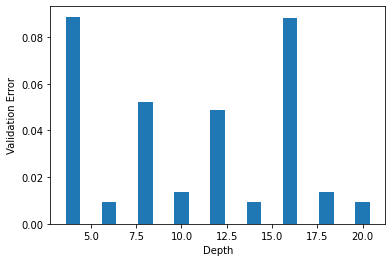

In [ ]:
plt.bar(lossPerDepth.keys(), lossPerDepth.values())
plt.xlabel("Depth")
plt.ylabel("Validation Error")
plt.show()

## Explaination
As the number of depth grows, the validation error decreases until overfitting happens.  